# SMS Spam Detection
    
    The SMS Spam Collection is a set of SMS tagged messages that have been collected for SMS Spam research. It contains one set of SMS messages in English of 5,574 messages, tagged acording being ham (legitimate) or spam.

    Acknowledgements

    The original dataset can be found in https://archive.ics.uci.edu/ml/datasets/SMS+Spam+Collection. The creators would like to note that in case you find the dataset useful, please make a reference to previous paper and the web page: http://www.dt.fee.unicamp.br/~tiago/smsspamcollection/ in your papers, research, etc.


### 1. Import Packages

In [127]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

### 2. Dataset Loading and Data Preprocessing
#### 2.1. Read dataset using pandas

In [128]:
# enter here
sms = pd.read_csv('sms_spam.csv' , encoding= 'ISO-8859-1')

sms.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


#### 2.2. Remove redundant attributes

In [129]:
# enter here
sms.drop(['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], inplace=True, axis=1)
sms.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


#### 2.3. Rename columns
Requires: v1 -> label, v2 -> message

In [130]:
# enter here
sms = sms.rename(columns = {'v1' : 'label', 'v2' : 'messenger'}, inplace = False)
sms.head()

,label,messenger
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


#### 2.4. Modify columns
Requires: change ham to 0, and spam to 1 in Label Attribute.

In [131]:
# enter here

sms.label = sms.label.map({"ham":0, "spam":1})
sms.head()

,label,messenger
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


#### 2.5. Add new column
Requires: Add message_len Attribute that is the length of the message.

In [132]:
# enter here
sms.insert(2,'Length', [len(char) for char in sms['messenger']], True)
sms.head()

,label,messenger,Length
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


#### 2.6. Histogram graph

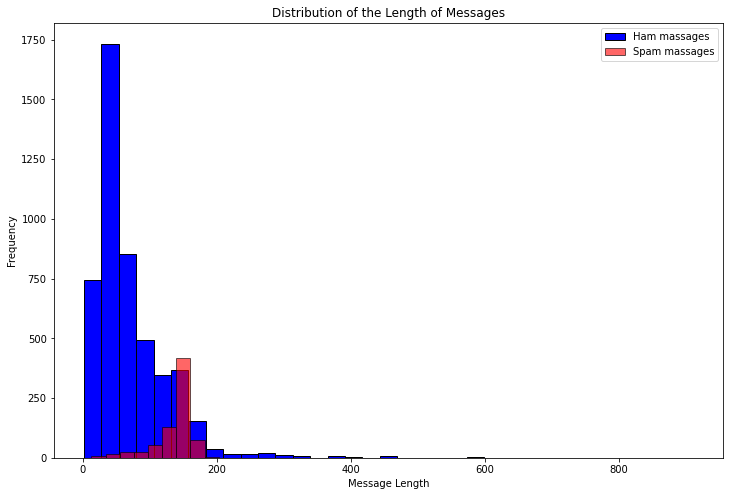

In [133]:
# enter here
plt.figure(figsize=(12,8))
plt.hist(x='Length', data=sms[sms['label']==0], color='blue', label='Ham massages', edgecolor ='black', bins=35)
plt.hist(x='Length', data = sms[sms['label']==1], color='red', label ='Spam massages', alpha = 0.6, edgecolor ='black')

plt.legend()
plt.title("Distribution of the Length of Messages")
plt.xlabel("Message Length")
plt.ylabel("Frequency")
plt.show()

#### 2.7. Preprocessing text 
    Takes in a string of text, then performs the following:
    1. Remove all punctuation
    2. Remove all stopwords
    3. Returns a list of the cleaned text

In [134]:
import string
from nltk.corpus import stopwords

def text_process(mess):
    STOPWORDS = stopwords.words('english') + ['u', 'ü', 'ur', '4', '2', 'im', 'dont', 'doin', 'ure']
    # Check characters to see if they are in punctuation
    nopunc = [char for char in mess if char not in string.punctuation]
    # Join the characters again to form the string.
    nopunc = ''.join(nopunc)
    # Now just remove any stopwords
    return ' '.join([word for word in nopunc.split() if word.lower() not in STOPWORDS])

In [135]:
# Apply the above function to preprocess the text.
try:
    sms.drop(columns=['new_messenger'], inplace=True, axis=1)
    sms.insert(3,'new_messenger', [text_process(char) for char in sms['messenger']], True)
except:
    sms.insert(3,'new_messenger', [text_process(char) for char in sms['messenger']], True)

try:
    sms.drop(columns=['new_length'], inplace=True, axis=1)
    sms.insert(4,'new_length', [len(char) for char in sms.new_messenger], True)
except:
    sms.insert(4,'new_length', [len(char) for char in sms.new_messenger], True)

sms.drop(columns=['messenger', 'Length'], inplace = True, axis=1)
sms = sms.rename(columns = {'new_messenger' : 'messenger', 'new_length' : 'length'}, inplace = False)
sms.head()
# enter here

,label,messenger,length
0,0,Go jurong point crazy Available bugis n great ...,82
1,0,Ok lar Joking wif oni,21
2,1,Free entry wkly comp win FA Cup final tkts 21s...,133
3,0,dun say early hor c already say,31
4,0,Nah think goes usf lives around though,38


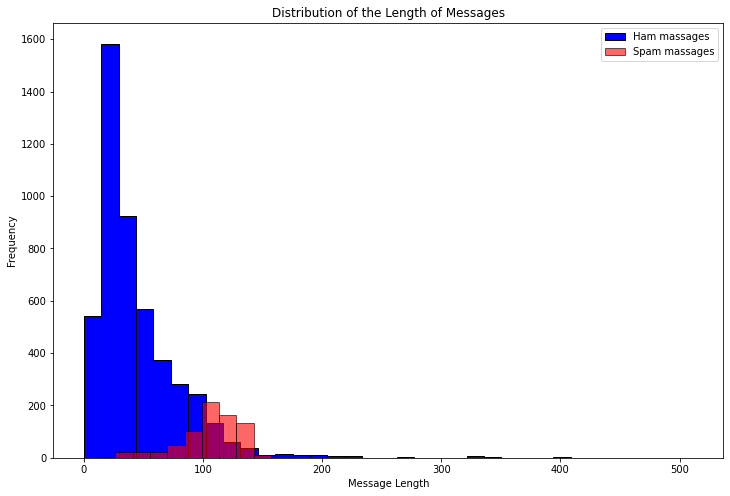

In [136]:
# Draw Histogram graph again with clean messages.
plt.figure(figsize=(12,8))
plt.hist(x='length', data=sms[sms['label']==0], color='blue', label='Ham massages', edgecolor ='black', bins=35)
plt.hist(x='length', data = sms[sms['label']==1], color='red', label ='Spam massages', alpha = 0.6, edgecolor ='black')

plt.legend()
plt.title("Distribution of the Length of Messages")
plt.xlabel("Message Length")
plt.ylabel("Frequency")
plt.show()
# enter here

#### 2.8. Feature extraction using TfidfVectorizer

In [137]:
# enter here
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(ngram_range=(1,1))

X_tfidf = tfidf.fit_transform(sms.messenger[1:])

X_tfidf.shape

(5571, 9369)

#### 2.9. Feature extraction using HashingVectorizer

In [138]:
# enter here
from sklearn.feature_extraction.text import HashingVectorizer

vectorizer = HashingVectorizer(n_features=2**4)
X_hv = vectorizer.fit_transform(sms.messenger[1:])

X_hv.shape

(5571, 16)

#### 2.10. Feature extraction using CountVectorizer

In [139]:
# enter here
from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer(ngram_range=(1,1))
X_cv = cv.fit_transform(sms.messenger[1:])

X_cv.shape

(5571, 9369)

#### 2.11. Your contributions

    Create clean_msg_2 with your text_process function. 
    Then, apply feature extraction using TfidfVectorizer, HashingVectorizer and CountVectorizer
    Compare the result with the default text_process function. 

### 3. Spam detection

In [140]:
from sklearn import tree
from sklearn.model_selection import KFold
from sklearn import metrics
import time

y = sms.label

# only using the decision tree classifier with default setting for training and predicting. 
# In other words, make no changes to this section.

model = tree.DecisionTreeClassifier()

#### 3.1. Using TF-IDF Vectorizer

    Requirements:
    1. Using 5-fold for spliting the dataset 
    2. Add accuracy of each fold to acc_tv
    3. Caculate and print the proccessing time
    4. Print mean of accuracy

In [141]:
acc_tv =[]
# enter here
from sklearn.model_selection import cross_val_score
from numpy import mean

start = time.time()
cv = KFold(n_splits=5)
acc_tv = cross_val_score(model, X_tfidf, y[1:], scoring='accuracy', cv=cv)
end = time.time()

print("Time run: ", end-start)
print("Accuracy TF-IDF: ", mean(acc_tv))


Time run:  1.3617799282073975
Accuracy TF-IDF:  0.9605099387332844


#### 3.2. Using Hashing Vectorizer
    Requirements:
    1. Using 5-fold for spliting the dataset 
    2. Add accuracy of each fold to acc_hv
    3. Caculate and print the proccessing time
    4. Print mean of accuracy

In [142]:

acc_hv = []
# enter here
start = time.time()
cv = KFold(n_splits=5)
acc_hv = cross_val_score(model, X_hv, y[1:], scoring='accuracy', cv=cv)
end = time.time()

print("Time run: ", end-start)
print("Accuracy Hashing Vectorizer: ", mean(acc_hv))

Time run:  0.2927072048187256
Accuracy Hashing Vectorizer:  0.8763280224778803


#### 3.3. Using Count Vectorizer

    Requirements:
    1. Using 5-fold for spliting the dataset 
    2. Add accuracy of each fold to acc_cv
    3. Caculate and print the proccessing time
    4. Print mean of accuracy

In [143]:
acc_cv = []
# enter here
start = time.time()
cv = KFold(n_splits=5)
acc_cv = cross_val_score(model, X_cv, y[1:], scoring='accuracy', cv=cv)
end = time.time()

print("Time run: ", end-start)
print("Accuracy Count Vectorizer: ", mean(acc_cv))

Time run:  0.9277796745300293
Accuracy Count Vectorizer:  0.9646382365490979


#### 3.4. Ploting Accuracies in 5-Folds

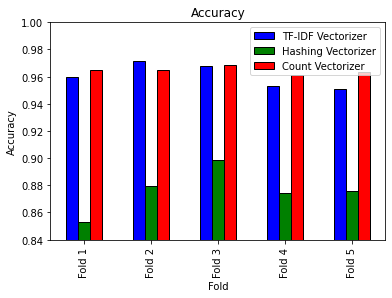

In [144]:
# enter here
Fold = ['Fold 1','Fold 2','Fold 3','Fold 4','Fold 5']

index = np.arange(5)
width = 0.18

plt.bar(index, acc_tv, width, color ='blue', label ='TF-IDF Vectorizer', edgecolor ='black')
plt.bar(index+width, acc_hv, width, color ='green', label ='Hashing Vectorizer', edgecolor = 'black')
plt.bar(index+width+width, acc_cv, width, color ='red', label ='Count Vectorizer', edgecolor = 'black')

plt.title('Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Fold')
plt.xticks((index+(width)), Fold, rotation = 90)

plt.ylim(0.84,1.0)
plt.legend()
plt.show()
